In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/mark/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Loading data
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df = df.dropna(axis=0)

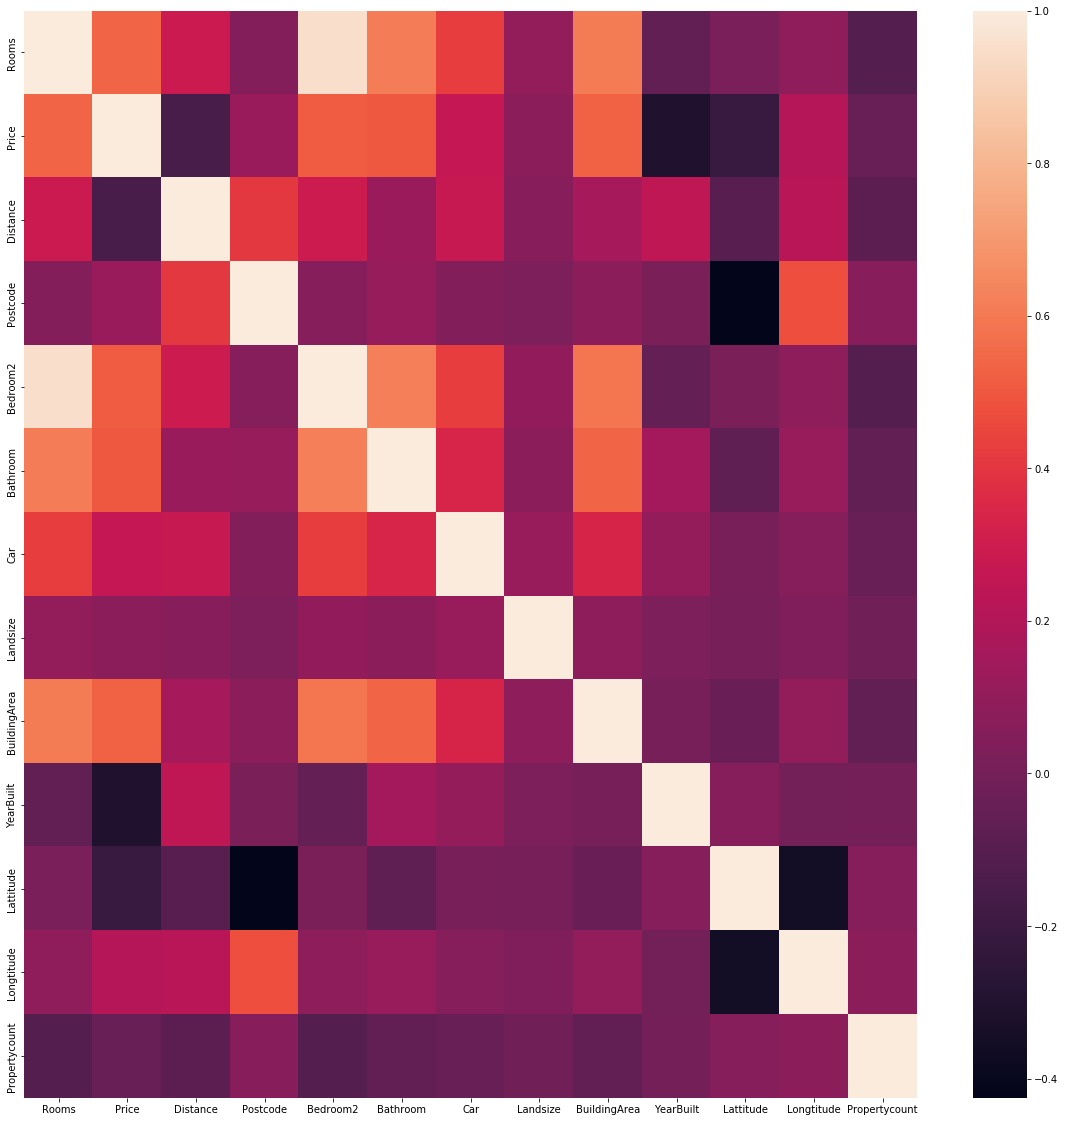

In [4]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [5]:
cat_var = df.dtypes[df.dtypes == "object"].index.tolist()

In [6]:
df[cat_var].nunique()

Suburb          287
Address        6117
Type              3
Method            5
SellerG         203
Date             51
CouncilArea      31
Regionname        8
dtype: int64

In [7]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df[cat_var]))
encode_df.columns=enc.get_feature_names(cat_var)
encode_df.head()

/Users/mark/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df = df.merge(encode_df, left_index=True, right_index=True)
df = df.drop(cat_var,1)
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Split training data into features (x_train) and labels (Y_train)
x_train = df.drop(columns=['Price'])
Y_train = df.Price

145.67144900000002 Seconds
Random Forest Regressor


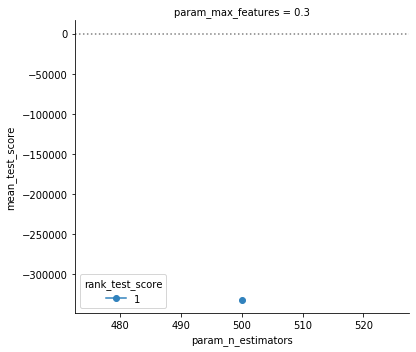

In [10]:
from time import process_time
import time as time

# Set paramters for Grid Search
param_grid =  {'n_estimators':[200, 300, 400, 500, 600],
               'max_features':[0.1, 0.3, 0.6]
              }
# Initialise the random forest model 
RandForest = RandomForestRegressor(n_jobs= -1, random_state = 1, bootstrap=True)

# Initialise Gridsearch CV with 5 fold corssvalidation and neggative root_mean_squared_error
Tuned_RandForest = GridSearchCV(estimator=RandForest, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

# Fit model & Time the process for training the model
start_time = time.process_time()
Tuned_RandForest.fit(x_train, Y_train)
# End of fit time
print(time.process_time() - start_time, "Seconds")

# Record the results for all models in a pandas dataframe and keep only the best model
Results = pd.DataFrame(Tuned_RandForest.cv_results_)
Results_Best = Results.loc[Results.rank_test_score==1]
    
print('Random Forest Regressor')
Results = Results.loc[Results.rank_test_score==1]

# Create a plot to show all models 

col = ['param_max_features']

for col in col:
    grid = sns.FacetGrid(Results, col=col, hue='rank_test_score', palette="tab20c", legend_out=False,
                         col_wrap=5, height=5)

    # Draw a horizontal line to show the starting point
    grid.map(plt.axhline, y=0, ls=":", c=".5")

    # Draw marker on plot and decide what parameters to plot
    grid.map(plt.plot, "param_n_estimators", "mean_test_score", marker="o")

    # Adjust the arrangement of the plots
    grid.fig.tight_layout(w_pad=1)
    
    # Add legend to gird 
    grid.add_legend()
    plt.savefig('pictures/best_forest_graph.png')

In [11]:
print(Results_Best)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8       6.676894      0.278172         0.139149        0.003745   

  param_max_features param_n_estimators  \
8                0.3                500   

                                       params  split0_test_score  \
8  {'max_features': 0.3, 'n_estimators': 500}     -380443.760307   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
8     -314004.856633     -332329.094515     -326554.919958     -306603.691093   

   mean_test_score  std_test_score  rank_test_score  
8   -331987.264501    25866.395159                1  
